In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
d = 3
n = 4
shape = (n,d)
mu_minus = np.zeros(shape=shape)
mu_minus

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [8]:
mu_minus[0].shape

(3,)

In [11]:
for x in mu_minus:
    print(np.add(x, np.ones(x.shape)))

[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]


In [13]:
targets = np.ones(shape=n)
targets

array([1., 1., 1., 1.])

In [16]:
targets.shape[0]

4

In [18]:
np.linalg.inv([[1, 2], [0, 1.5]])

array([[ 1.        , -1.33333333],
       [ 0.        ,  0.66666667]])

In [19]:
np.mean([np.ones(5), np.zeros(5), np.zeros(5), np.ones(5), np.ones(5)])

0.6

In [3]:
L = np.array([np.array([0, 1, 2, 3]), np.array([1, 0, 1, 2]), np.array([2, 1, 0, 1]), np.array([3, 2, 1, 0])])
L

array([[0, 1, 2, 3],
       [1, 0, 1, 2],
       [2, 1, 0, 1],
       [3, 2, 1, 0]])

In [5]:
np.exp(5)

148.4131591025766

In [6]:
np.exp(1)

2.718281828459045

In [2]:
np.inf

inf

In [8]:
1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 < np.inf

True

In [4]:
data = np.array([np.array([0, 1]), np.array([1, 3]), np.array([1, 2])])
data

array([[0, 1],
       [1, 3],
       [1, 2]])

In [9]:
def get_feature_mapping(x, degree=1):
    x1 = x[0]
    x2 = x[1]
    ans = [1]
    for i in range(1, degree+1):
        ans.append(x1**i)
        ans.append(x2**i)
        for j in range(1, i):
            ans.append((x1**j)*(x2**(i-j)))
    return ans


In [11]:
get_feature_mapping(data[1], 3)

[1, 1, 3, 1, 9, 3, 1, 27, 9, 3]

In [16]:
n = data.shape[0]
phi = list(np.zeros(shape=n))
for i in range(n):
    phi[i] = get_feature_mapping(data[i], 2)
phi = np.array(phi)
phi

array([[1, 0, 1, 0, 1, 0],
       [1, 1, 3, 1, 9, 3],
       [1, 1, 2, 1, 4, 2]])

In [17]:
phi.shape

(3, 6)

In [10]:
X,Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
X.shape

(100, 100)

In [24]:
Z = np.array([np.ndarray.flatten(X), np.ndarray.flatten(Y)])
np.transpose(Z)

array([[-1.        , -1.        ],
       [-0.97979798, -1.        ],
       [-0.95959596, -1.        ],
       ...,
       [ 0.95959596,  1.        ],
       [ 0.97979798,  1.        ],
       [ 1.        ,  1.        ]])

In [28]:
X1_train = np.random.uniform(low=-1, high=1, size=50)
X2_train = np.random.uniform(low=-1, high=1, size=50)
X_train = np.transpose(np.array([X1_train, X2_train]))
X_train

array([[ 0.99583429, -0.42480129],
       [ 0.26818309, -0.47476651],
       [ 0.56314266,  0.61514869],
       [-0.66563728, -0.71150678],
       [-0.53508011, -0.44787686],
       [-0.97246339,  0.96686409],
       [ 0.95095471,  0.21564412],
       [ 0.31198807, -0.68085568],
       [-0.69271778,  0.99243266],
       [ 0.97316591, -0.54642931],
       [ 0.87173877,  0.15168359],
       [-0.20664698,  0.68272307],
       [-0.56436773, -0.35768549],
       [ 0.03578046,  0.8707516 ],
       [ 0.189376  ,  0.1002525 ],
       [-0.25459105, -0.53820747],
       [ 0.74297289, -0.89602718],
       [-0.3880707 , -0.77944053],
       [-0.02295361,  0.03301   ],
       [ 0.40767615, -0.14660978],
       [ 0.45705935,  0.63167286],
       [ 0.08759673, -0.37567192],
       [-0.91729646,  0.05015847],
       [ 0.83050777, -0.95139061],
       [-0.02147897, -0.81808641],
       [ 0.2295713 ,  0.63264054],
       [ 0.88074622, -0.80467738],
       [-0.82728097, -0.03281736],
       [ 0.87612294,

In [27]:
def get_train_value(x):
    a = np.array([0.5, 0.5])
    b = np.array([-0.5, -0.5])
    c = np.array([0.5, -0.5])
    return np.exp(-4*np.dot(np.subtract(x, a), np.subtract(x, a))) + np.exp(-4*np.dot(np.subtract(x, b), np.subtract(x, b))) + np.exp(-4*np.dot(np.subtract(x, c), np.subtract(x, c)))

In [29]:
get_train_value(X_train[0])

0.3780191086282584

In [32]:
def get_Y_train(X_train):
    n = X_train.shape[0]
    Y_train = np.zeros(n)
    for i in range(n):
        Y_train[i] = get_train_value(X_train[i])
    return Y_train

In [33]:
get_Y_train(X_train)

array([3.78019109e-01, 9.16696899e-01, 9.40220487e-01, 7.52909008e-01,
       9.98329781e-01, 1.46507608e-04, 3.78001646e-01, 8.27741590e-01,
       1.39772431e-03, 4.10162387e-01, 4.59479544e-01, 1.21861657e-01,
       9.17518216e-01, 2.44100439e-01, 5.54975500e-01, 8.84647824e-01,
       4.23117072e-01, 7.27232477e-01, 3.76637598e-01, 7.90450011e-01,
       9.32211743e-01, 7.35911787e-01, 1.48729981e-01, 2.86458833e-01,
       4.92101247e-01, 7.00767502e-01, 3.87238093e-01, 2.72769143e-01,
       2.18347554e-01, 2.91012371e-03, 9.66728952e-01, 7.44547931e-01,
       7.32464332e-01, 3.09153846e-01, 1.96675206e-01, 8.12655560e-01,
       5.55942376e-01, 2.29055272e-01, 8.75701209e-01, 5.01845047e-01,
       5.90801405e-01, 9.20571319e-01, 4.88250438e-01, 8.29896563e-01,
       3.87041752e-02, 7.47388022e-02, 2.63656462e-01, 2.10772040e-02,
       9.71130841e-01, 6.83750010e-01])

In [34]:
wt_vectors = [np.array([1, 3, 2]), np.array([2, 5, 2])]
np.mean(wt_vectors, axis=0)

array([1.5, 4. , 2. ])

In [2]:
lin_arr = np.array([1, 4, -3, 5, 0])

In [3]:
lin_arr**2

array([ 1, 16,  9, 25,  0])

In [4]:
np.mean(lin_arr**2)

10.2

In [3]:
dataset4_1 = np.load("Datasets/dataset4_1.npz")
dataset4_1.files

['arr_0', 'arr_1', 'arr_2', 'arr_3']

In [5]:
dataset4_1['arr_0'].shape

(1000, 2)

In [8]:
arr = np.array([np.array([1, 2, 3]), np.array([3, 2, 1]), np.array([0, 3 ,2]), np.array([-1, 4, 2])])

In [9]:
np.argmin(arr)

9

In [4]:
X_train = dataset4_1['arr_0']
Y_train = dataset4_1['arr_1']
X_test = dataset4_1['arr_2']
Y_test = dataset4_1['arr_3']

In [13]:
print(X_train[0].min(), X_train[1].min(), sep='\t')
print(X_test[0].min(), X_test[1].min(), sep='\t')
print(Y_train.min(), Y_train.max(), sep='\t')
print(Y_test.min(), Y_test.max(), sep='\t')

-0.7416482108943891	0.1346573685407857
0.2273144412996262	-0.9065192085765277
-0.9978642330473028	0.9908076592978262
-0.9998972331202817	0.9998393583025621


In [11]:
wt_vector = list(np.zeros(shape=(5,6)))
wt_vector

[array([0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0.])]

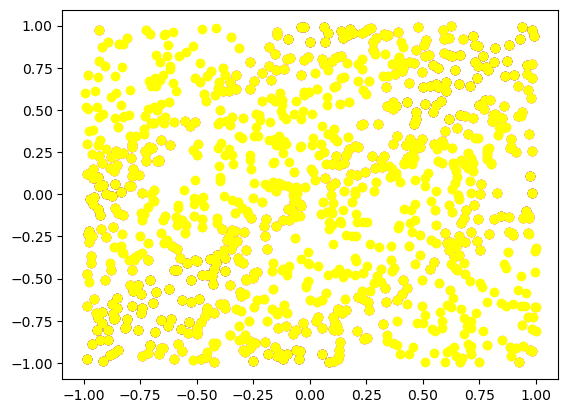

In [24]:
X = X_train[:,0]
Y = X_train[:,1]
Z = Y_train

plt.figure()
plt.scatter(x=X[Z > 0.5], y=Y[Z > 0.5], c="Black")
plt.scatter(x=X[Z > 0], y=Y[Z > 0], c="Red")
plt.scatter(x=X[Z > -0.5], y=Y[Z > -0.5], c="Pink")
plt.scatter(x=X, y=Y, c="Yellow")
plt.show()